# Data Exploration & Feature Extraction & Deep Learning CNN Detection from                                                                                                                                              tcga Dataset . Medmain Assignment                                                                                                                                         By Anustup Mukherjee

Firstly in the given data set it is stated that it is a data of histopathological image data set of cancer areas divided into two forms one is caricnoma anather is neoplastic. Now the carcinoma part generally deals with malignancy or cancer proliferated parts , where as the neoplastic images contains a little outgrowth which doesnt tend to cancer at this moment. Now the dataset is provided with 5 carcinoma and 5 neoplastic images and the anotated areas of the carcinoma images is stored in a json file which deals with data argumentation path. 

Now let us discuss the steps i followed in step by step pattern.The cluster of the algorithm is provided in the pdf file.
Step 1 : First the i plotted the carcinoma image data set , here due to less amount of data i am concentrating in individual image analysis.

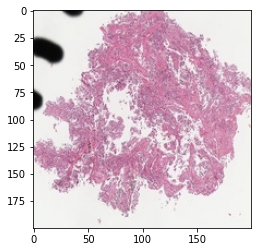

In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
im = np.array(Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma1.tiff"), dtype=np.uint8)
im2 = np.array(Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma2.tiff"), dtype=np.uint8)
im3 = np.array(Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma3.tiff"), dtype=np.uint8)
im4 = np.array(Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma4.tiff"), dtype=np.uint8)
plt.imshow(im)


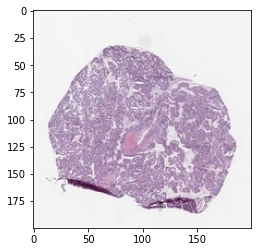

In [20]:
plt.imshow(im2)

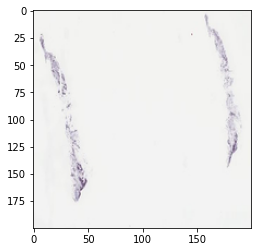

In [21]:
plt.imshow(im3)

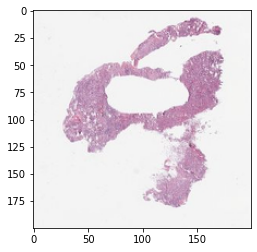

In [22]:
plt.imshow(im4)

Step 2 : Now am going to work with the data annotation part , now as per the given data it is shown that the annotated section path is stored in the json file as json object , now in order to make the model buffer free and easy running in a single way in any deployable environment  , first i converted each json file into csv then did manipulations based on each image data lets see :

In [23]:
# For image 1 : json >> csv , now lets visualize the data first
import pandas as pd  
# making data frame  
df = pd.read_csv(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\annotations\data_carcinoma1.csv") 
df.head()

,id,path__x,path__y,labelName
0,cjx2ubyir000h01mcf6c0fc9w,100.19,31.83,colon-adenocarcinoma
1,NaN,99.68,31.03,NaN
2,NaN,99.57,31.03,NaN
3,NaN,99.34,31.03,NaN
4,NaN,99.17,30.96,NaN


In [24]:
#Here we are having two data coloumns having X_label and Y_Label for the annotation 
#now first we will find out the max_X , max_Y label and min_X and min_Y label
df[['path__x']].idxmax()

path__x    0
dtype: int64

In [25]:
df[['path__y']].idxmax()

path__y    2249
dtype: int64

In [26]:
df[['path__y']].idxmin()

path__y    414
dtype: int64

In [27]:
df[['path__x']].idxmin()

path__x    1755
dtype: int64

In [28]:
#now we will find the value for the above stated points 
df.iloc[2240:2250] #for max_y

,id,path__x,path__y,labelName
2240,NaN,39.36,93.91,NaN
2241,NaN,39.47,94.05,NaN
2242,NaN,39.70,94.13,NaN
2243,NaN,39.98,94.20,NaN
2244,NaN,40.15,94.27,NaN
2245,NaN,40.43,94.34,NaN
2246,NaN,40.72,94.42,NaN
2247,NaN,41.00,94.49,NaN
2248,NaN,41.11,94.56,NaN
2249,NaN,41.23,94.63,NaN


In [29]:
df.iloc[1750:1756] #for min_x

,id,path__x,path__y,labelName
1750,NaN,-0.01,62.65,NaN
1751,NaN,-0.01,62.87,NaN
1752,NaN,-0.12,63.30,NaN
1753,NaN,-0.18,63.52,NaN
1754,NaN,-0.24,63.88,NaN
1755,NaN,-0.29,64.39,NaN


In [30]:
df.iloc[410:415] #for min_y

,id,path__x,path__y,labelName
410,NaN,51.93,-0.30,NaN
411,NaN,51.71,-0.37,NaN
412,NaN,51.59,-0.37,NaN
413,NaN,51.37,-0.51,NaN
414,NaN,51.14,-0.66,NaN


In [31]:
#now here we have the values of the coordinates min_x,min_y : (0,0)<appx>
#max_x and max_y : (100,95)

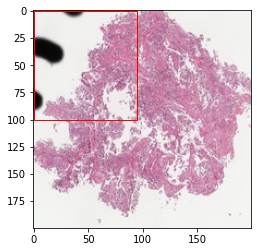

In [32]:
#now here we will plot the annotation on the image to understand the cancer part
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im)
# Create a Rectangle patch h=95 w=100
rect = patches.Rectangle((0,0),95,100,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [33]:
#now here in this step we will crop out the annotated part and sav in our local machine in name carcinoma_a1
# Improting Image class from PIL module 
from PIL import Image 
# Opens a image in RGB mode 
im = Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma1.tiff") 
# Setting the points for cropped image 
left = 0
top = 0
right = 100
bottom = 100
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
im1.show() 
#now image is saved 

In [34]:
#now we will deal with next image having label lung carcinoma 
#again following the above mentioned steps 
# For image 2 : json >> csv , now lets visualize the data first
import pandas as pd  
# making data frame  
df = pd.read_csv(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\annotations\data_carcinoma2.csv") 
df.head()


,id,path__x,path__y,labelName
0,cjxlu6n62001201ju53qdfy82,6.77,52.00,lung-carcinoma
1,NaN,7.21,50.84,NaN
2,NaN,7.31,50.58,NaN
3,NaN,7.42,50.45,NaN
4,NaN,7.53,50.32,NaN


In [35]:
df[['path__x']].idxmax()

path__x    989
dtype: int64

In [36]:
df[['path__y']].idxmax()

path__y    1286
dtype: int64

In [37]:
df[['path__x']].idxmin()

path__x    2045
dtype: int64

In [38]:
df[['path__y']].idxmin()

path__y    319
dtype: int64

In [39]:
#now we will find the value for the above stated points 
df.iloc[1284:1287] #for max_y

,id,path__x,path__y,labelName
1284,NaN,76.15,93.03,NaN
1285,NaN,76.04,93.03,NaN
1286,NaN,76.04,93.16,NaN


In [40]:
df.iloc[987:990] #for max_x

,id,path__x,path__y,labelName
987,NaN,93.12,60.90,NaN
988,NaN,93.12,61.03,NaN
989,NaN,93.23,61.03,NaN


In [41]:
df.iloc[2044:2046] #for min_x

,id,path__x,path__y,labelName
2044,NaN,6.77,53.42,NaN
2045,NaN,6.67,53.29,NaN


In [42]:
df.iloc[317:320] #for min_y

,id,path__x,path__y,labelName
317,NaN,36.82,16.00,NaN
318,NaN,36.92,16.00,NaN
319,NaN,37.03,15.87,NaN


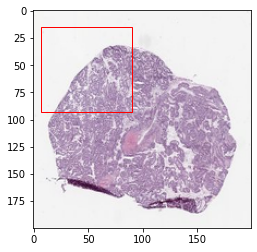

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im2)
# Create a Rectangle patch h=95 w=100
rect = patches.Rectangle((7,15),83,78,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [46]:
#now here in this step we will crop out the annotated part and sav in our local machine in name carcinoma_a1
# Improting Image class from PIL module 
from PIL import Image 
# Opens a image in RGB mode 
im = Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma2.tiff") 
# Setting the points for cropped image 
left = 7
top = 10
right = 100
bottom = 110
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
im1.show() 
#now image is saved 

In [47]:
#now coming to other two images , following the same steps above 
import pandas as pd  
# making data frame  
df = pd.read_csv(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\annotations\data_carcinoma3.csv") 
df.head()

,id,path__x,path__y,labelName
0,cjy3w6gws002j01k0beh7auju,20.92,86.61,lung-carcinoma
1,NaN,20.86,86.73,NaN
2,NaN,20.86,86.75,NaN
3,NaN,20.85,86.77,NaN
4,NaN,20.85,86.79,NaN


In [50]:
df[['path__x']].idxmax()

path__x    5878
dtype: int64

In [51]:
df[['path__y']].idxmax()

path__y    4630
dtype: int64

In [52]:
df[['path__x']].idxmin()

path__x    2927
dtype: int64

In [53]:
df[['path__y']].idxmin()

path__y    10791
dtype: int64

In [54]:
df.iloc[10790:10792] #for min_y

,id,path__x,path__y,labelName
10790,NaN,79.08,2.04,NaN
10791,NaN,79.10,2.02,NaN


In [55]:
df.iloc[2925:2928] #for min_x

,id,path__x,path__y,labelName
2925,NaN,3.38,14.86,NaN
2926,NaN,3.38,14.87,NaN
2927,NaN,3.37,14.89,NaN


In [56]:
df.iloc[5876:5879] #for max_x

,id,path__x,path__y,labelName
5876,NaN,93.77,57.56,NaN
5877,NaN,93.77,57.58,NaN
5878,NaN,93.78,57.62,NaN


In [57]:
df.iloc[4628:4632] #for max_y

,id,path__x,path__y,labelName
4628,NaN,19.88,72.60,NaN
4629,cjy3wah3w002z01k09ajl7rsa,18.89,87.30,lung-carcinoma
4630,NaN,18.86,87.32,NaN
4631,NaN,18.85,87.31,NaN


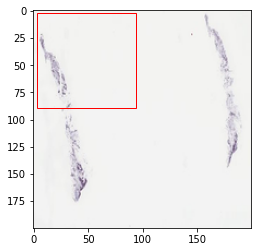

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im3)
# Create a Rectangle patch h=95 w=100
rect = patches.Rectangle((3,2),91,87,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [60]:
#now here in this step we will crop out the annotated part and sav in our local machine in name carcinoma_a1
# Improting Image class from PIL module 
from PIL import Image 
# Opens a image in RGB mode 
im = Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma3.tiff") 
# Setting the points for cropped image 
left = 0
top = 0
right = 100
bottom = 110
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
im1.show() 
#now image is saved

In [61]:
#now finally last image 
import pandas as pd  
# making data frame  
df = pd.read_csv(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\annotations\data_carcinoma4.csv") 
df.head()


,id,path__x,path__y,labelName
0,cjxh03vc2001301l61porbo1h,14.93,58.70,lung-carcinoma
1,NaN,14.93,58.84,NaN
2,NaN,15.08,58.99,NaN
3,NaN,15.08,59.13,NaN
4,NaN,15.38,59.27,NaN


In [62]:
df[['path__x']].idxmax()

path__x    1175
dtype: int64

In [63]:
df[['path__y']].idxmax()

path__y    702
dtype: int64

In [64]:
df[['path__x']].idxmin()

path__x    3083
dtype: int64

In [65]:
df[['path__y']].idxmin()

path__y    2558
dtype: int64

In [66]:
df.iloc[1172:1176] #for max_x

,id,path__x,path__y,labelName
1172,NaN,86.29,23.29,NaN
1173,NaN,86.45,23.29,NaN
1174,NaN,86.45,23.14,NaN
1175,NaN,86.60,23.14,NaN


In [68]:
df.iloc[700:704] #for max_y

,id,path__x,path__y,labelName
700,NaN,63.27,89.95,NaN
701,NaN,63.57,90.10,NaN
702,NaN,63.88,90.24,NaN
703,NaN,64.18,90.24,NaN


In [69]:
df.iloc[3080:3084] #for min_x

,id,path__x,path__y,labelName
3080,NaN,14.01,51.10,NaN
3081,NaN,14.01,51.24,NaN
3082,NaN,14.01,51.39,NaN
3083,NaN,13.86,51.53,NaN


In [70]:
df.iloc[2556:2560] #for min_y

,id,path__x,path__y,labelName
2556,NaN,75.62,4.22,NaN
2557,NaN,75.47,4.22,NaN
2558,NaN,75.31,4.08,NaN
2559,NaN,75.16,4.08,NaN


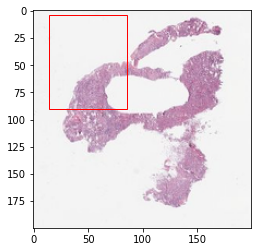

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(im4)
# Create a Rectangle patch h=95 w=100
rect = patches.Rectangle((14,4),72,86,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [73]:
#now here in this step we will crop out the annotated part and sav in our local machine in name carcinoma_a1
# Improting Image class from PIL module 
from PIL import Image 
# Opens a image in RGB mode 
im = Image.open(r"C:\Users\Anustup\Desktop\Projects\Deep Learning Diagnosis of Cancers\Data\train\carcinoma\carcinoma4.tiff") 
# Setting the points for cropped image 
left = 10
top = 0
right = 110
bottom = 110
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
im1.show() 
#now image is saved

Now we are done with data annotation , plotting of the annotated part in the image is done , the annotated image is now stored in the file storage . Now the data is having two classes of the train data called Carcinoma and neoplastic . Now let us do some kind of more data exploration with the data to understand the spread of the data well. 

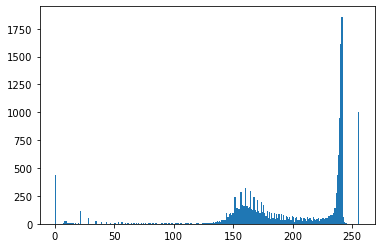

In [1]:
#Firstly Let us analyse the pixel values of the annotated cancer images
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\train\carcinoma\carcinoma1.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#observation of cross pixel of max value of 1750 px

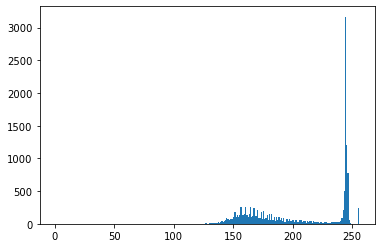

In [6]:
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\train\carcinoma\carcinoma2.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#max pixel upto 1500 px

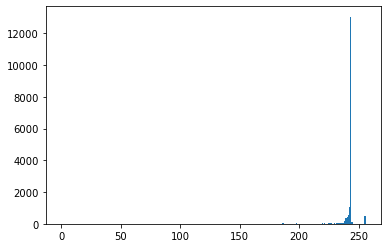

In [7]:
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\train\carcinoma\carcinoma3.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#max pixel upto 2000 px

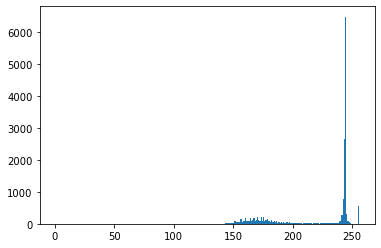

In [9]:
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\train\carcinoma\carcinoma4.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#image pixel max 3000 px

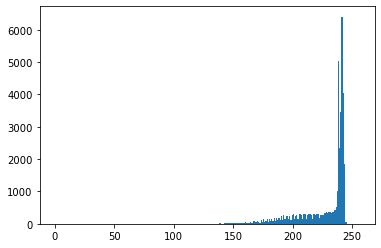

In [10]:
#Now let us analyse the image pixel of the neoplastic part 
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\test\neoplastic\neoplastic1.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#High image pixel crossing 6000 px

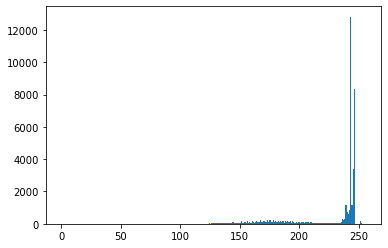

In [12]:
#Now let us analyse the image pixel of the neoplastic part 
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\test\neoplastic\neoplastic2.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#High image pixel crossing 4000 px

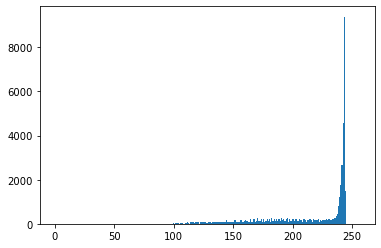

In [13]:
#Now let us analyse the image pixel of the neoplastic part 
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread(r"C:\Users\Anustup\Desktop\cancerss\test\neoplastic\neoplastic3.PNG",0) 
# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
#High image pixel crossing 5000 px

Now Let we have a understand about the image pixels , in the two classes of the carcinoma and neoplastic images that will help us for the better understanding of CNN based feature extraction. Now let us visualize the cancer data in a 3D veiw , for the region analysis of the annotated section.

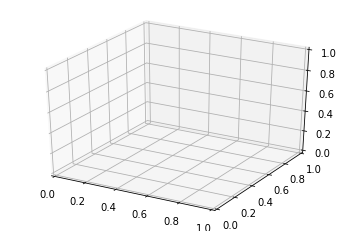

In [14]:
#Now let us visualize the data in 3D part
#step 1 : setting parameters for the image visualiztion 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
from mpl_toolkits import mplot3d

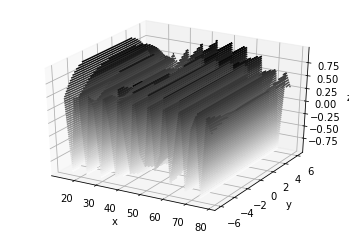

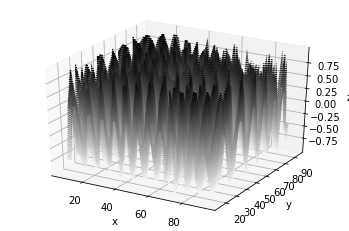

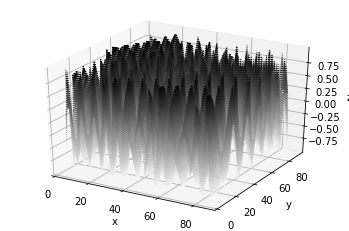

In [17]:
#step 2 : Visualizing data - carcinoma image 1 
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(14, 78, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#visualizing carcinoma image 2
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(7, 93, 30)
y = np.linspace(15, 93, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#visualizing carcinoma image 3
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(4, 86, 30)
y = np.linspace(4, 90, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

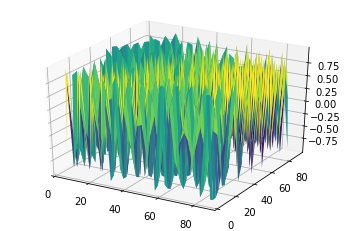

In [23]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis',edgecolor='none')


# Now training the model after Exploratory Data Analysis by CNN Models for   

# feature extraction from the image data set 

# First Neural Network - CNN- VGG 16 ( Viusual Geometry model)

Just briefing what we have done above is first we plotted our carcinoma image dataset , nalysed its annotated paths , plotted the annotation on the image , cropped out the annotated section , saved in our local directory , next we did further data exploration and plotted region expansion of the image data set , understanded its pixel vlues and region of its spread . Now after this data exploration we will be finally training a neural network for the feature extraction from the image data set.

Here we have used VGG 16 model of CNN which is : (VGG16 is a convolution neural net (CNN )), considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters

step 1 : Here I first importing all the libraries which i will need to implement VGG16. I will be using Sequential method as I am creating a sequential model. Sequential model means that all the layers of the model will be arranged in sequence. Here I have imported ImageDataGenerator from keras.preprocessing. The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many function to rescale, rotate, zoom, flip etc. The most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model.

In [24]:
#step 1 : 
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.
C:\Users\Anustup\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anustup\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anustup\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anustup\Anaconda3\lib\site-packages\tensorflow\python\framework\d

Here I am creating and object of ImageDataGenerator for both training and testing data and passing the folder which has train data to the object trdata and similarly passing the folder which has test data to the object tsdata

In [26]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\Users\Anustup\Desktop\cancerss\train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\Users\Anustup\Desktop\cancerss\test", target_size=(224,224))

Found 7 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [452]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

Here I have started with initialising the model by specifying that the model is a sequential model. After initialising the model I add
→ 2 x convolution layer of 64 channel of 3x3 kernal and same padding
→ 1 x maxpool layer of 2x2 pool size and stride 2x2
→ 2 x convolution layer of 128 channel of 3x3 kernal and same padding
→ 1 x maxpool layer of 2x2 pool size and stride 2x2
→ 3 x convolution layer of 256 channel of 3x3 kernal and same padding
→ 1 x maxpool layer of 2x2 pool size and stride 2x2
→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding
→ 1 x maxpool layer of 2x2 pool size and stride 2x2
→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding
→ 1 x maxpool layer of 2x2 pool size and stride 2x2

I also add relu(Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

After creating all the convolution I pass the data to the dense layer so for that I flatten the vector which comes out of the convolutions and add
→ 1 x Dense layer of 4096 units
→ 1 x Dense layer of 4096 units
→ 1 x Dense Softmax layer of 2 units
I will use RELU activation for both the dense layer of 4096 units so that I stop forwarding negative values through the network. I use a 2 unit dense layer in the end with softmax activation as I have 2 classes to predict from in the end which are dog and cat. The softmax layer will output the value between 0 and 1 based on the confidence of the model that which class the images belongs to.

After the creation of softmax layer the model is finally prepared. Now I need to compile the model.

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Here I will be using Adam optimiser to reach to the global minima while training out model. If I am stuck in local minima while training then the adam optimiser will help us to get out of local minima and reach global minima. We will also specify the learning rate of the optimiser, here in this case it is set at 0.001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.
I can check the summary of the model which I created by using the code below.

In [ ]:
model.summary()

The output of this will be the summary of the model which I just created

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

After the creation of the model I will import ModelCheckpoint and EarlyStopping method from keras. I will create an object of both and pass that as callback functions to fit_generator.
ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. In this case I am monitoring validation accuracy by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.
EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which I have set to monitor in EarlyStopping. In this case I am monitoring validation accuracy by passing val_acc to EarlyStopping. I have here set patience to 20 which means that the model will stop to train if it doesn’t see any rise in validation accuracy in 20 epochs.
I am using model.fit_generator as I am using ImageDataGenerator to pass data to the model. I will pass train and test data to fit_generator. In fit_generator steps_per_epoch will set the batch size to pass training data to the model and validation_steps will do the same for test data. You can tweak it based on your system specifications.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
img = image.load_img("./",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("carcinoma")
else:
    print("neoplastic")

# Find my proposed structure and algorithm in the attached PDF. 